In [12]:
from load_data import load_labeled_data
from plot_accuracy import plot_stepwise_accuracy
import pandas as pd
import numpy as np

In [3]:
data = load_labeled_data(data_dir = './Data', label_list=['CANCER_LUSC','CANCER_LUAD'])

In [11]:
# cancer data labeling
df = pd.get_dummies(data, columns=['Target'], drop_first=True)

In [5]:
ranking_df = pd.read_csv('ranking_df.csv',index_col=0)
ranking_df.columns = ['RF','EXT']
ranking_df

,RF,EXT
?|100130426,2087,5128
?|100133144,2087,1946
?|100134869,2087,5128
?|10357,579,769
?|10431,2087,5128
...,...,...
ZYX|7791,2087,5128
ZZEF1|23140,2087,5128
ZZZ3|26009,2087,5128
psiTPTE22|387590,2087,4021


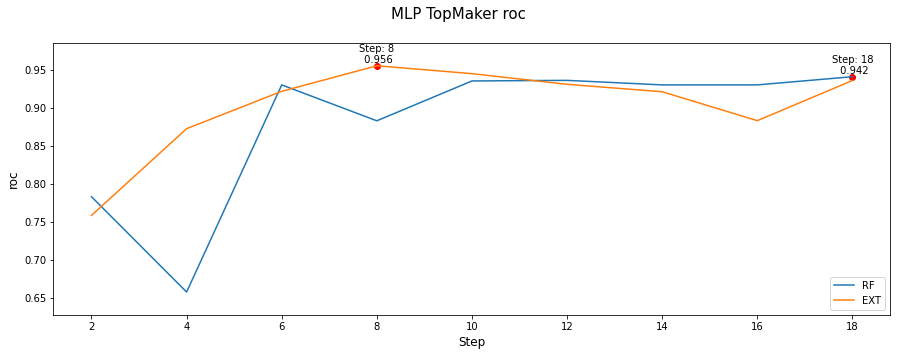

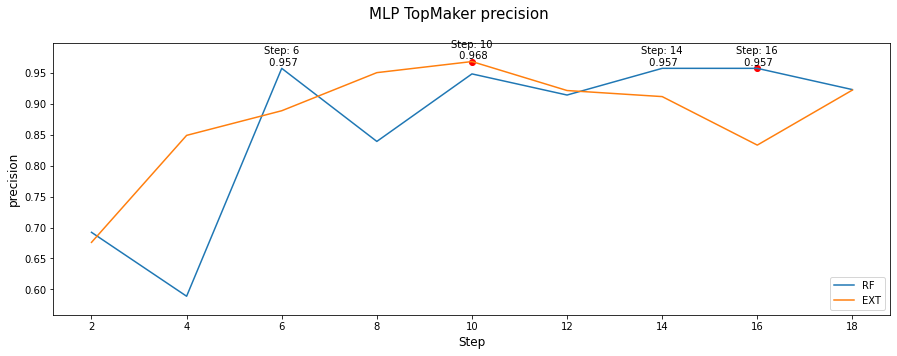

In [7]:
# metrics 옵션 'f1', 'accuracy', 'precision', 'recall', 'roc'
step_num = list(np.arange(2,20,2))
score_df = plot_stepwise_accuracy(df, ranking_df[['RF','EXT']], step_num, model = {'MLP': "recommended"}, accuracy_metric=['roc', 'precision'])

In [8]:
score_df

,RF_roc,RF_precision,EXT_roc,EXT_precision
2,0.783462,0.692308,0.758846,0.676056
4,0.657885,0.588957,0.873077,0.849057
6,0.930769,0.957447,0.922308,0.888889
8,0.883462,0.839286,0.955962,0.950495
10,0.935962,0.948454,0.945577,0.968421
12,0.936731,0.914286,0.931538,0.921569
14,0.930769,0.957447,0.921731,0.911765
16,0.930769,0.957447,0.883654,0.833333
18,0.941538,0.923077,0.936538,0.922330


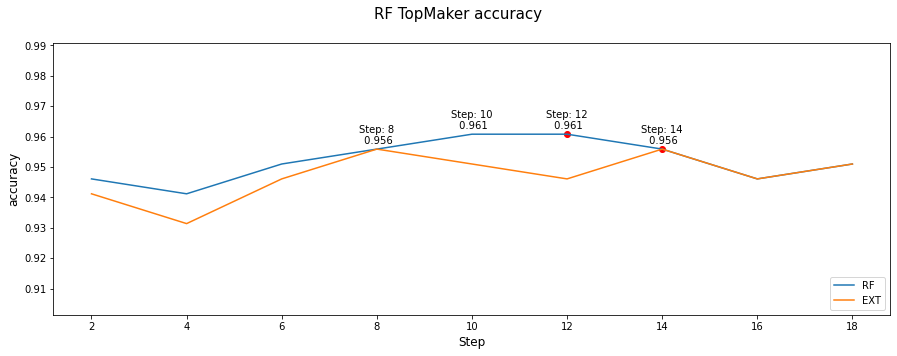

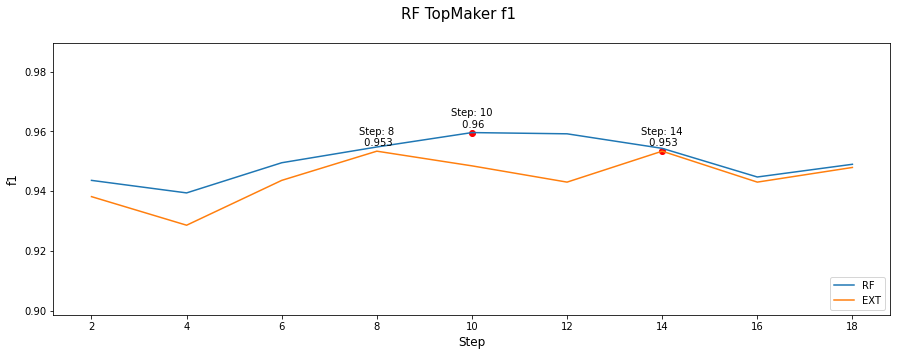

In [9]:
step_num = list(np.arange(2,20,2))
score_df = plot_stepwise_accuracy(df, ranking_df[['RF','EXT']], step_num, model = {'RF': "recommended"}, accuracy_metric=['accuracy', 'f1'])

In [10]:
score_df

,RF_accuracy,RF_f1,EXT_accuracy,EXT_f1
2,0.946078,0.943590,0.941176,0.938144
4,0.941176,0.939394,0.931373,0.928571
6,0.950980,0.949495,0.946078,0.943590
8,0.955882,0.954774,0.955882,0.953368
10,0.960784,0.959596,0.950980,0.948454
12,0.960784,0.959184,0.946078,0.943005
14,0.955882,0.954315,0.955882,0.953368
16,0.946078,0.944724,0.946078,0.943005
18,0.950980,0.948980,0.950980,0.947917
